Mean Squared Error: 0.07416325833412434
Mean Absolute Error: 0.21242995946499926
R-squared: 0.03428519568010524
Cross-Validation Scores: [0.04932286 0.01271813 0.02139295 0.03089471 0.02067053]
Average CV Score: 0.026999834867191996


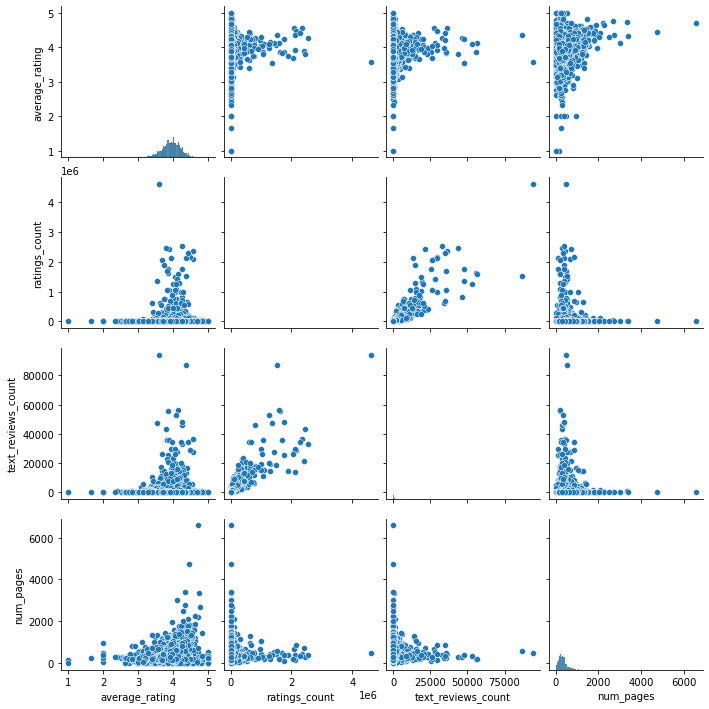

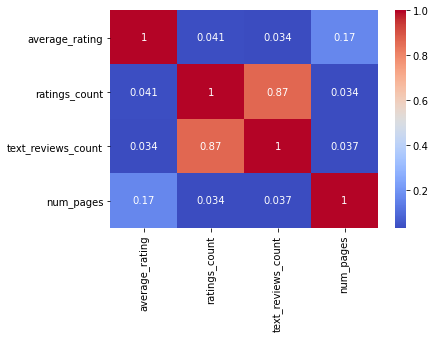

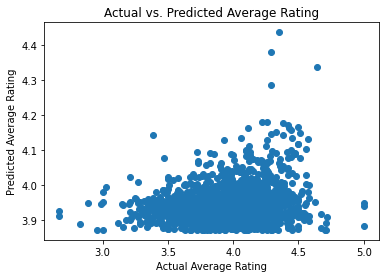

In [17]:
#I combined all my code here for exploring my processes of model discovering
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
data = pd.read_csv(r'C:\Users\rosee\Downloads\books_analysis_output.csv')

# Remove leading spaces from column name
data.rename(columns=lambda x: x.strip(), inplace=True)

# Selecting features and target variable
X = data[['ratings_count', 'text_reviews_count', 'num_pages']]
y = data['average_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error, mean absolute error, and R-squared score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Pairplot to visualize relationships between numerical variables
sns.pairplot(data[['average_rating', 'ratings_count', 'text_reviews_count', 'num_pages']])
plt.show()

# Correlation heatmap
correlation_matrix = data[['average_rating', 'ratings_count', 'text_reviews_count', 'num_pages']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Average Rating")
plt.ylabel("Predicted Average Rating")
plt.title("Actual vs. Predicted Average Rating")
plt.show()

